In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D
from htmresearch.support.gridcells.context_integration.context_layer import ContextLayer
from htmresearch.support.gridcells.context_integration.utils import (create_module_shape, 
                                                                     create_action_tensor, 
                                                                     get_actions, 
                                                                     get_3d_actions,
                                                                     get_closed_3d_path,
                                                                     load_digit_features)

from scipy.stats import entropy

%matplotlib inline
%load_ext autoreload
%autoreload 2



# m = 5   # Number of modules
# n = 23   # Approximate number of cells per module dimension
# d = 15   # Cells per minicolumn
# w = 10   # Code weight of the sensory SDR

FAC = 1

m = 8     # Number of modules
n = 30   # Approximate number of cells per module dimension
d = 20   # Cells per minicolumn
w = 5   # Code weight of the sensory SDR

zero = np.zeros(2*m)

# dx,dy,dz = get_actions(m,3)
dx,dy = get_actions(m,2)
dz = 2*dx + 9*dy



module_shapes = create_module_shape(m,n, rmin=-10,rmax=5)
action_tensor = create_action_tensor(m) 

X, V = get_closed_3d_path(num_samples=20, radius=5)

CL  = ContextLayer(layer_height=d, module_shapes=module_shapes, action_map=action_tensor, max_activity=200) 

F = load_digit_features(w=w, shape=CL.layer.shape)

print CL


**Context Layer:**
------------------
Number of cells:	 7120
Layer Shape:		 (20, 356)
Hyper-Module Shapes:
[[34 25]
 [22 24]
 [35 33]
 [35 25]
 [27 29]
 [22 27]
 [26 31]
 [35 35]]
Module bounds: [   0  850 1378 2533 3408 4191 4785 5591 6816]
Number of grid cells:	 6816
Activity bound:		 200
------------------


In [13]:
def top_k(score, k):
    return np.argsort(score)[::-1][:k]

def sparsify(arr, k):
    arr_ = np.zeros(arr.shape).reshape(-1)
    sorted_args = np.argsort(arr.reshape(-1))[::-1]
    top_k = sorted_args[:k]
    arr_[top_k] = 1.
    return arr_.reshape(arr.shape)

def explode(CL, x, V):
    CL.clear()
    CL.add(x)
    x_ = sum([ CL.explore(v1*dx + v2*dy + v3*dz, mentally=True) for v1,v2,v3 in V])
    CL.clear()
    CL.add(x_)
    return CL.layer.copy()

def reassamble(CL, x, V):
    CL.clear()
    CL.add(x)
    x_ = sum([ CL.explore(-v1*dx - v2*dy - v3*dz, mentally=True) for v1,v2,v3 in V])
    CL.clear()
    CL.add(x_)
    return x_





**Context Layer:**
------------------
Number of cells:	 280
Layer Shape:		 (20, 14)
Hyper-Module Shapes:
[[22 11]]
Module bounds: [  0 242]
Number of grid cells:	 242
Activity bound:		 200
------------------
Overlap of SDR and Reconsruction ...1 of 1 ...1.0
6.0 6.0


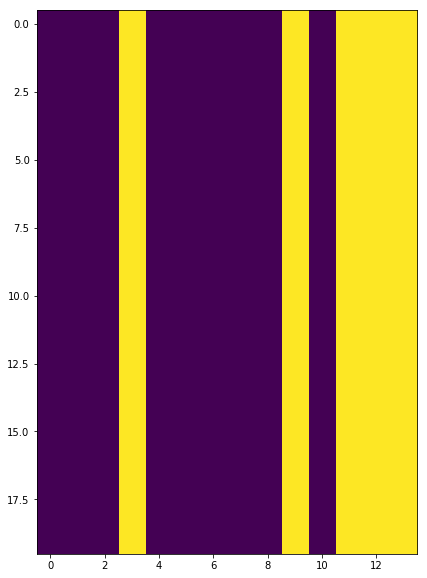

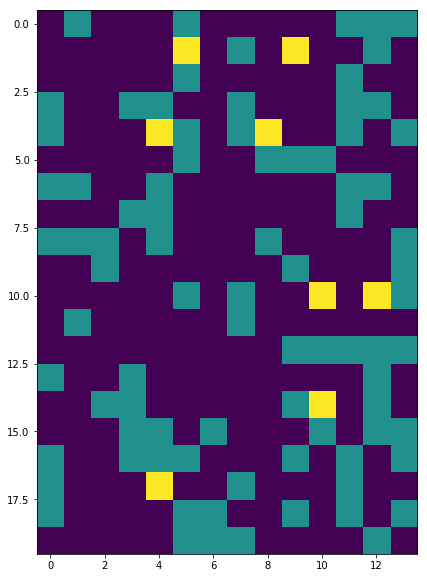

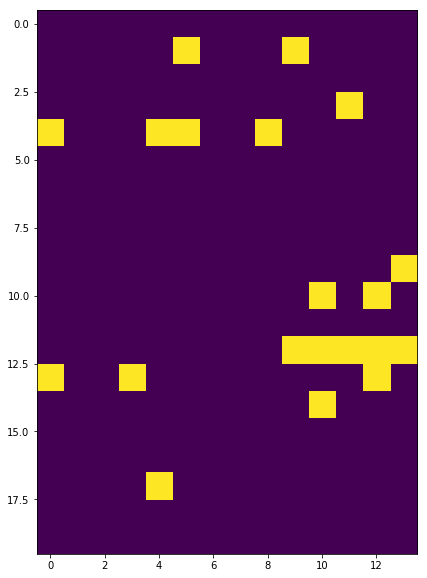

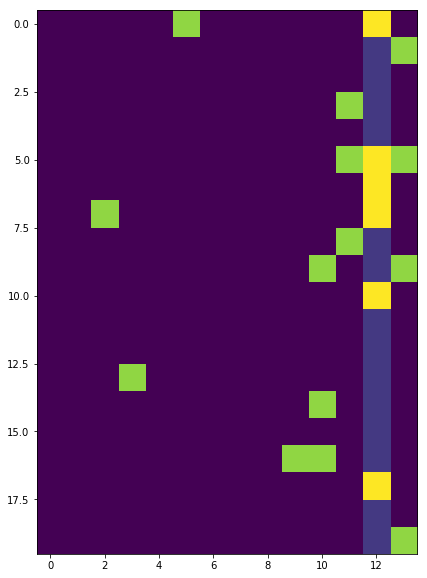

In [14]:
m = 1    # Number of modules
n = 20   # Approximate number of cells per module dimension
d = 20   # Cells per minicolumn
w = 1    # Code weight of the sensory SDR


dx,dy = get_actions(m,2)
module_shapes = create_module_shape(m, n, rmin=-10, rmax=10)
action_tensor = create_action_tensor(m) 
CL  = ContextLayer(layer_height=d, module_shapes=module_shapes, action_map=action_tensor, max_activity=200) 

num_landmarks = 5



V = np.random.randint(-5,5, size=(num_landmarks,2))


X  = np.zeros((num_landmarks, CL.layer_shape[0], CL.layer_shape[1]))
X_ = np.zeros((num_landmarks, CL.layer_shape[0], CL.layer_shape[1]))

x = CL.layer
A = np.zeros((100, CL.layer_shape[0], CL.layer_shape[1]))


ff = np.random.choice(CL.layer_shape[1], size=(num_members, 1), replace=False)
for t in range(num_members):

    X[t,:,ff[t]] = 1.0
#     ff = np.random.choice(CL.layer_shape[1], size=w, replace=False)
#     X[t,:,ff] = 1.0
    CL.clear()
    CL.add(X[t])
    CL.explore(sum([ v1*dx + v2*dy + v3*dz  for v1,v2,v3 in Vs[t]]) )
    X_[t] = CL.layer
#     A[t] = CL.get_random_anchor()

    
    
x  = np.sum(X, axis=0)
x_  = np.sum(X_, axis=0)
x__ = sparsify(x_, w*d)
x_hat = reassamble(CL, x__, Vs[0])

print CL

SDR = set(np.argsort(np.sum(X[0], axis=0))[::-1][:w])
SDR_ = set(np.argsort(np.sum(x_hat, axis=0))[::-1][:w])

print "Overlap of SDR and Reconsruction ...{} of {} ...{}".format(len(SDR & SDR_), w, len(SDR & SDR_)/float(w))
print np.amax(np.sum(x_hat, axis=0)), np.amax( np.sum( x_hat[:,ff[0]] )  )
    


plt.figure(figsize=(20,10))
plt.imshow(x)
plt.show()
plt.figure(figsize=(20,10))
plt.imshow(x_)
plt.show()
plt.figure(figsize=(20,10))
plt.imshow(x__)
plt.show()
plt.figure(figsize=(20,10))

plt.imshow(5*x_hat + X[0])
plt.show()




    
